# Dataset *heart_failure_clinical_records_dataset*

# *Data Dimensionality*

- **How many variables are there in the dataset?**<br>
A: 13 variables (age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, time, DEATH_EVENT;


- **And how many records?**<br>
A: 299 records;


- **What is the ratio between the number of records and variables?**<br>
A: 299/13 = 23. 23 record for variable.


- **What are the types for each variable?**<br>
float64 : age <br>
int64 : anaemia <br>
int64 : creatinine_phosphokinase <br>
int64 : diabetes <br>
int64 : ejection_fraction <br>
int64 : high_blood_pressure <br>
float64 : platelets <br>
float64 : serum_creatinine <br>
int64 : serum_sodium <br>
int64 : sex <br>
int64 : smoking <br>
int64 : time <br>
int64 : DEATH_EVENT <br>


- **How many missing values are there per variable?**<br>
A:0

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import ds_functions as ds
import scipy.stats as _stats
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
data = pd.read_csv('datasets/heart_failure_clinical_records_dataset.csv', parse_dates=True, infer_datetime_format=True)
data.shape

(299, 13)

## Nr of records vs nr variable

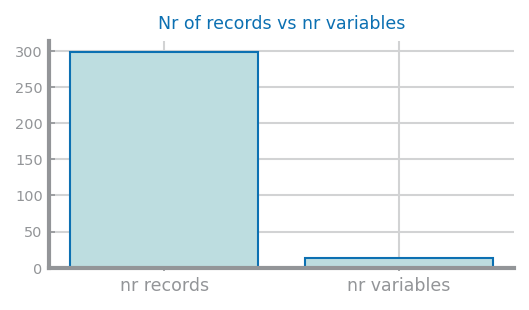

In [83]:
plt.figure(figsize=(4,2))
values = {'nr records': data.shape[0], 'nr variables': data.shape[1]}
ds.bar_chart(values.keys(), values.values(), title='Nr of records vs nr variables')

## Data Types

In [84]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

## Missing values 

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

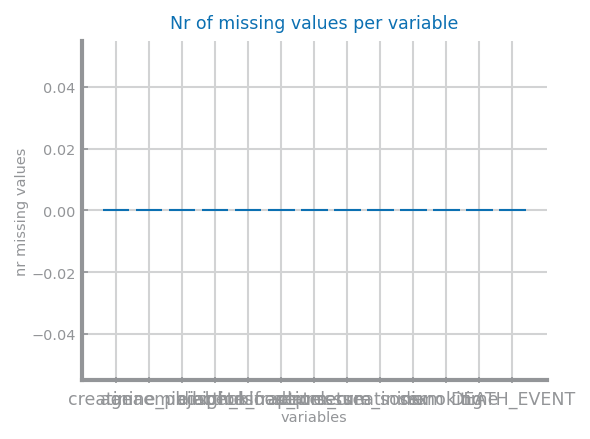

In [85]:
plt.figure()
mv = {}
for var in data:
    mv[var] = data[var].isna().sum()
ds.bar_chart(mv.keys(), mv.values(), title='Nr of missing values per variable',
               xlabel='variables',
               ylabel='nr missing values')
mv.values()

# *Data Distribution*

In [86]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Boxplots all numeric variables

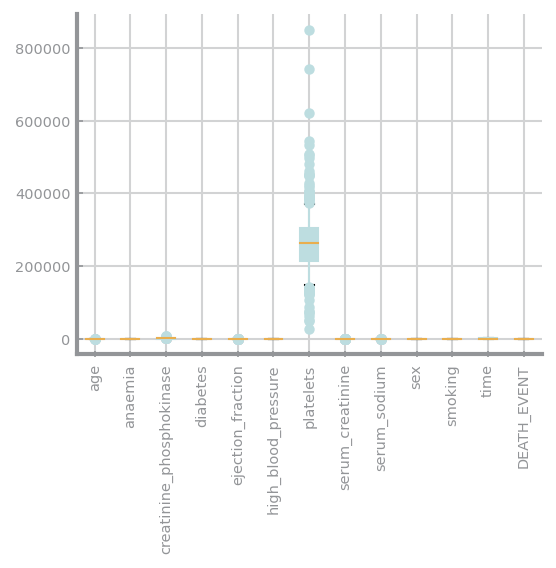

In [87]:
data.boxplot(rot=90)
plt.show()

## Boxplots for each variables

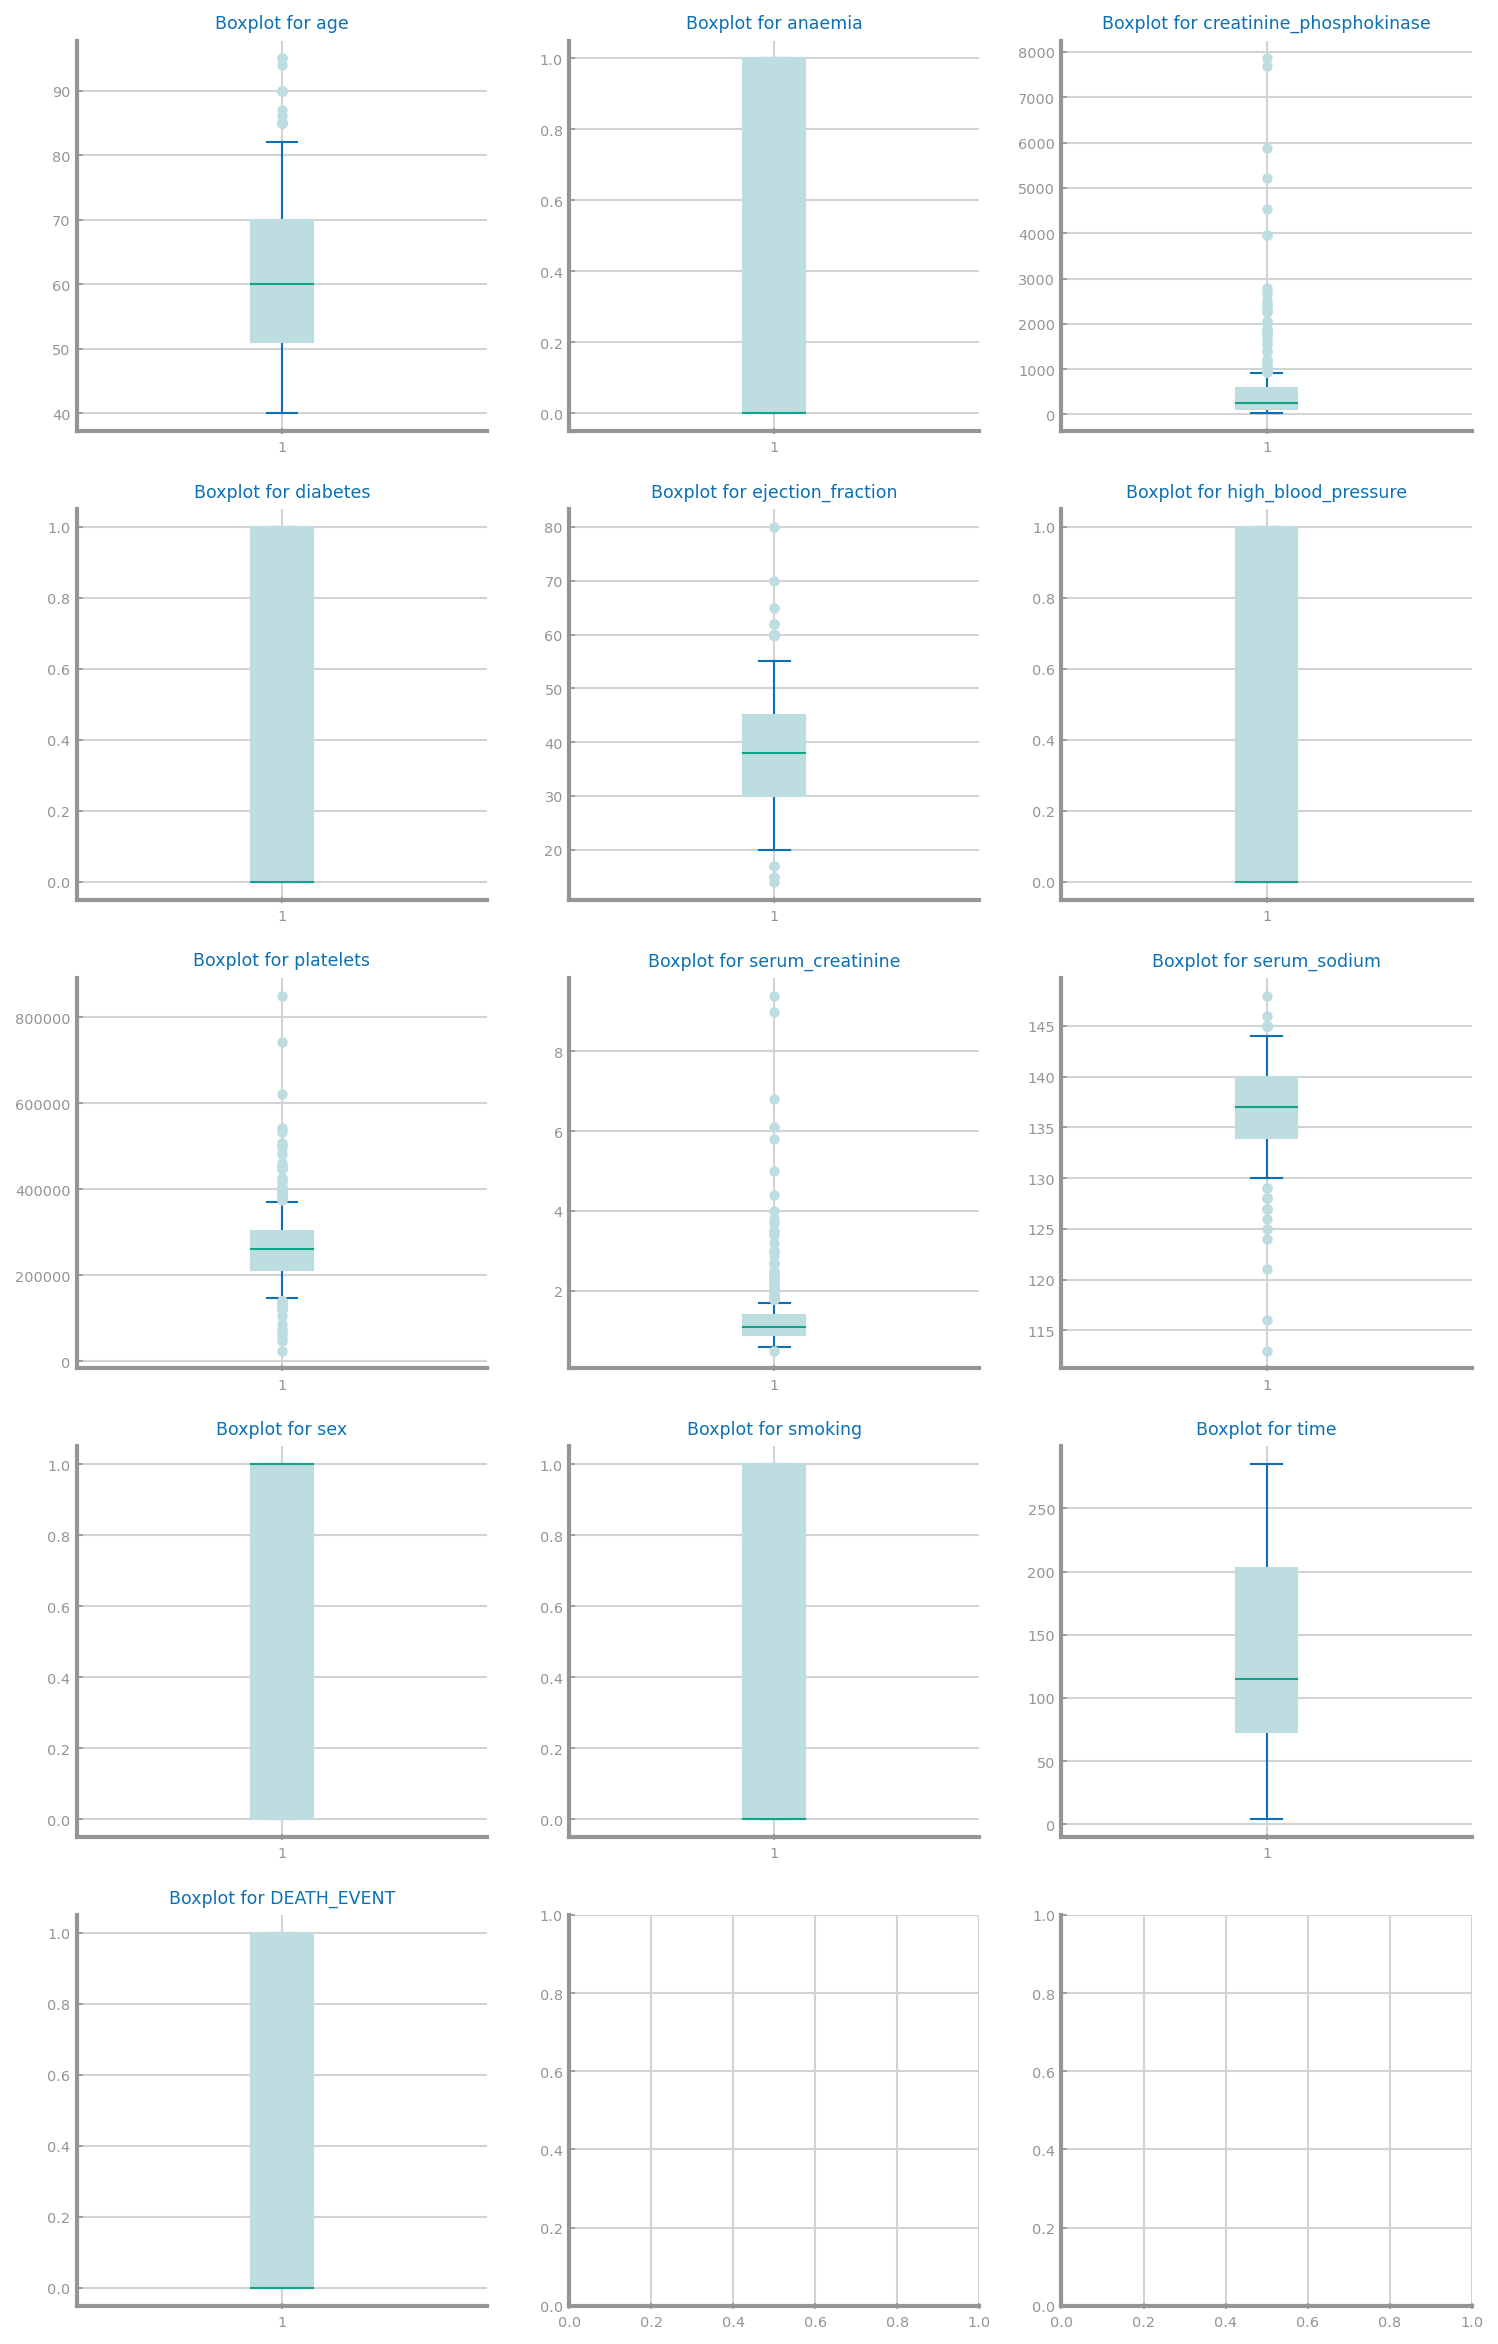

In [90]:
numeric_vars = data.select_dtypes(include='number').columns
rows, cols = ds.choose_grid(len(numeric_vars))
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(numeric_vars)):
    axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
    axs[i, j].boxplot(data[numeric_vars[n]].dropna().values)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

## histogram for each numeric variable (variables distribution)

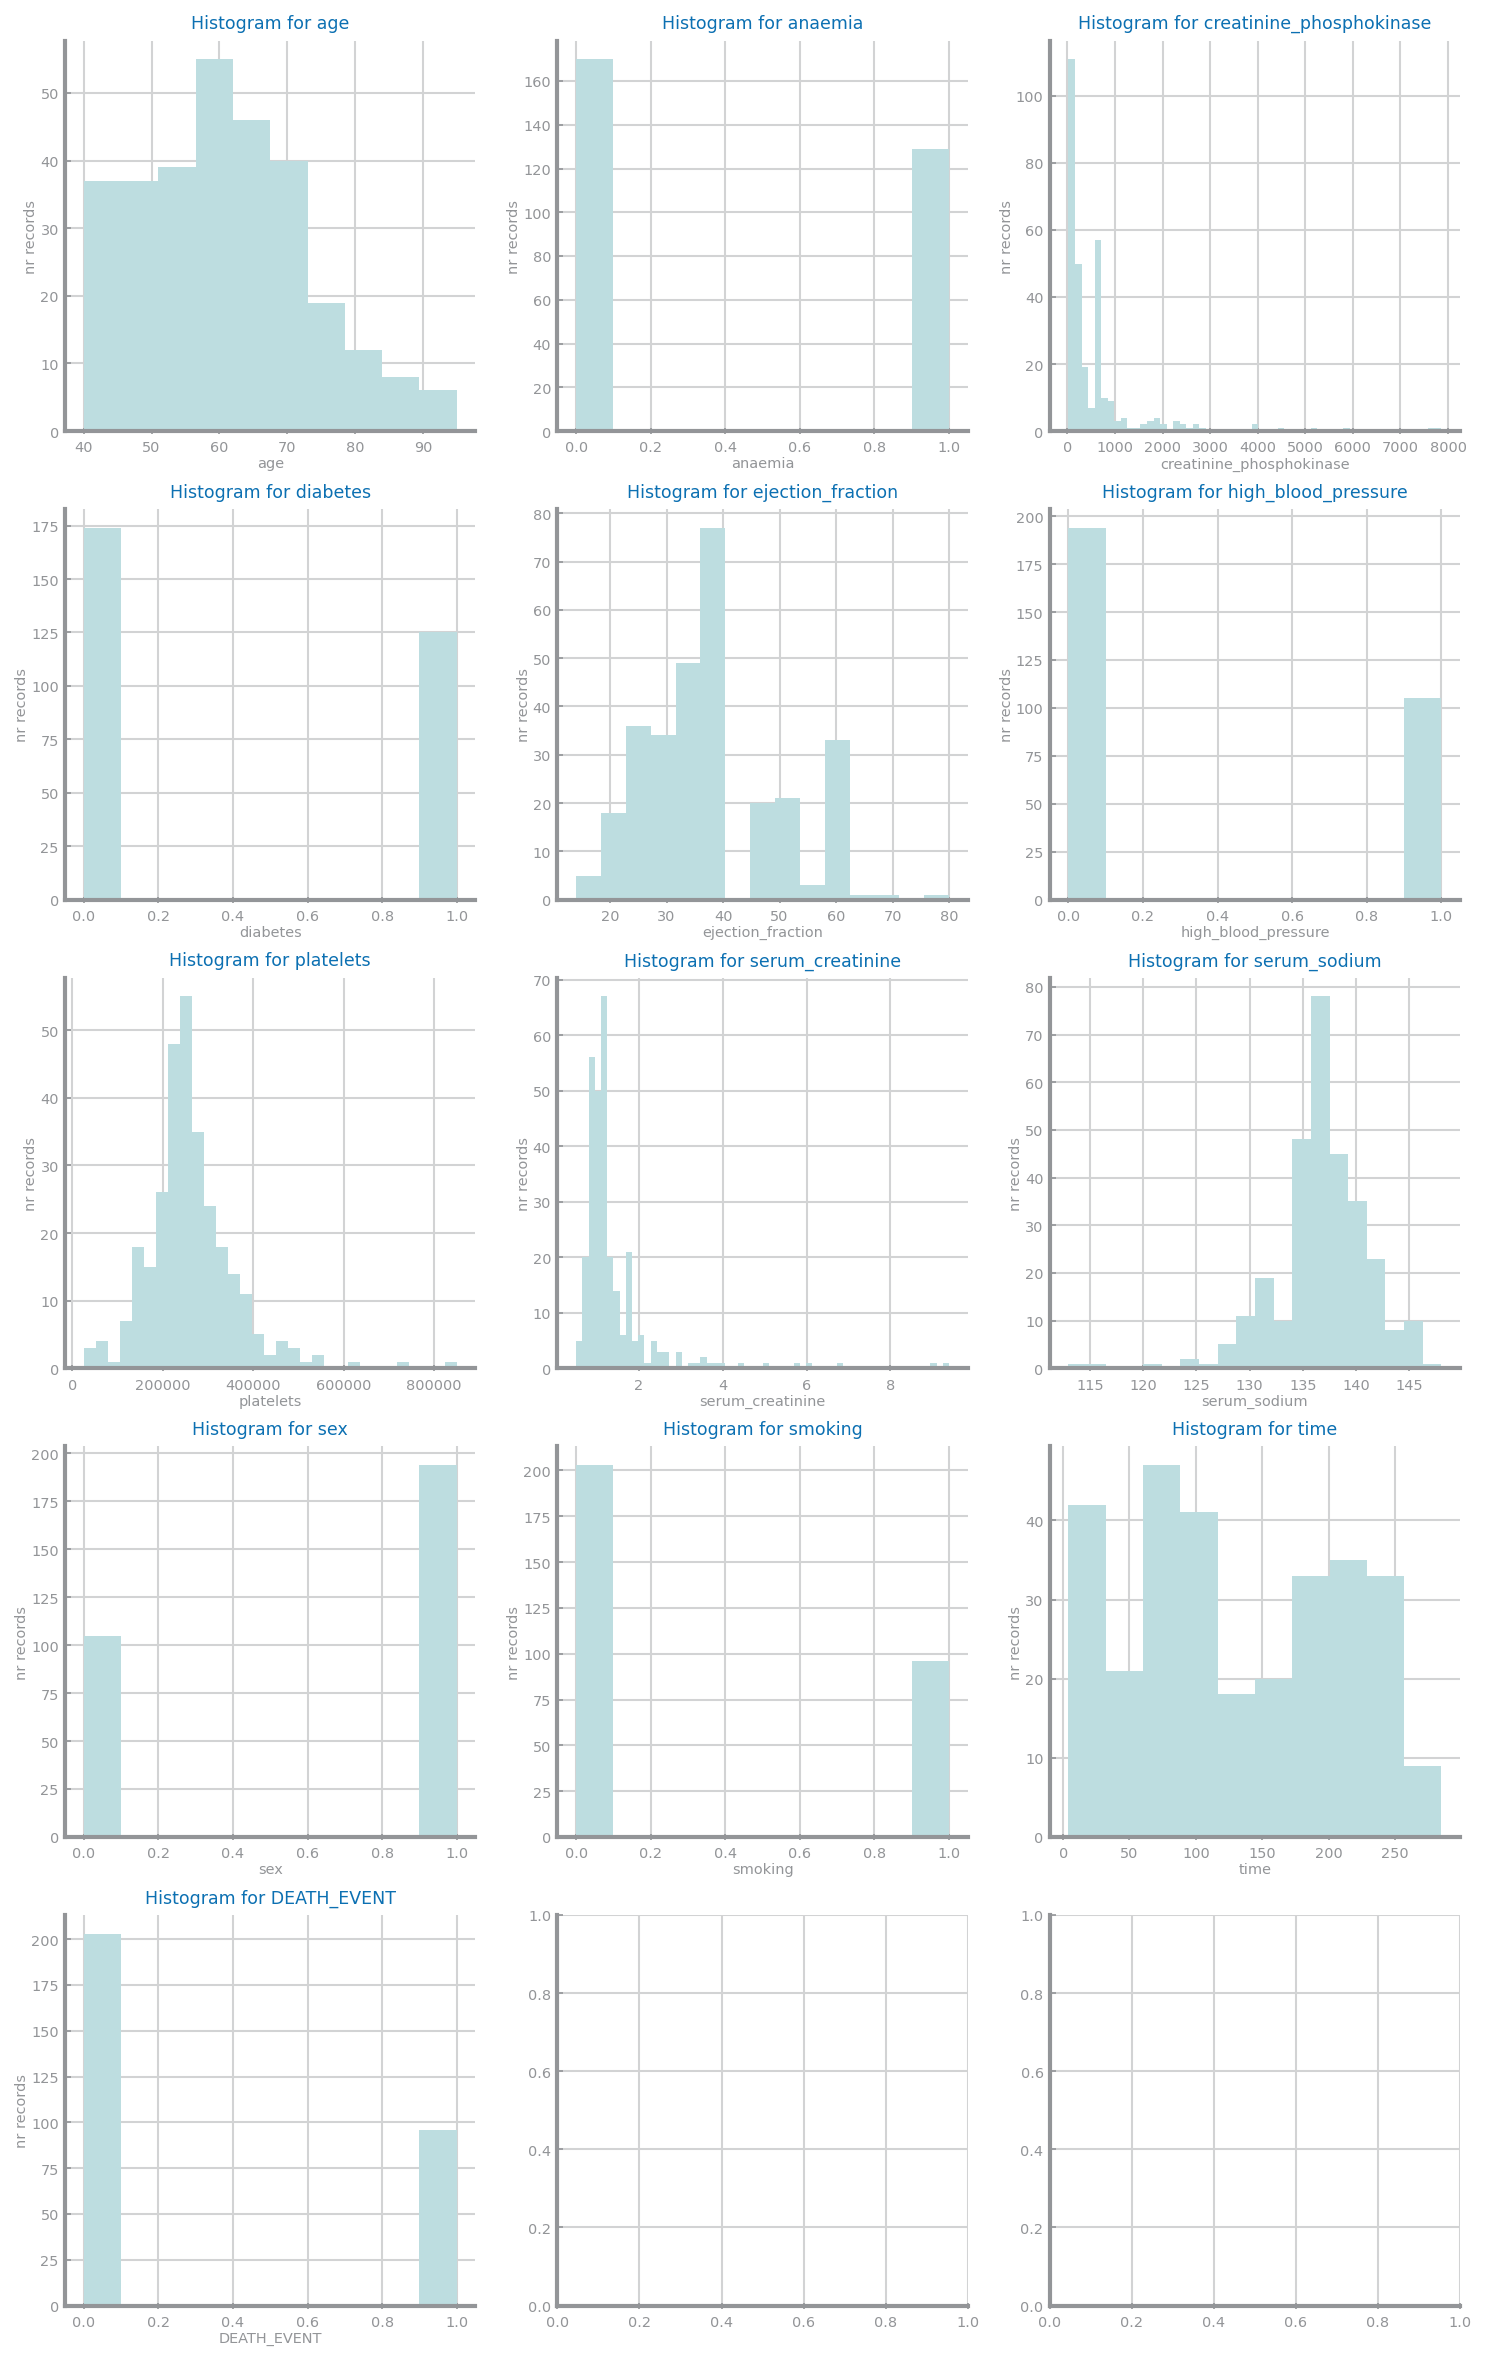

In [91]:
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(numeric_vars)):
    axs[i, j].set_title('Histogram for %s'%numeric_vars[n])
    axs[i, j].set_xlabel(numeric_vars[n])
    axs[i, j].set_ylabel("nr records")
    axs[i, j].hist(data[numeric_vars[n]].dropna().values, 'auto')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

## Best fit for the each variable

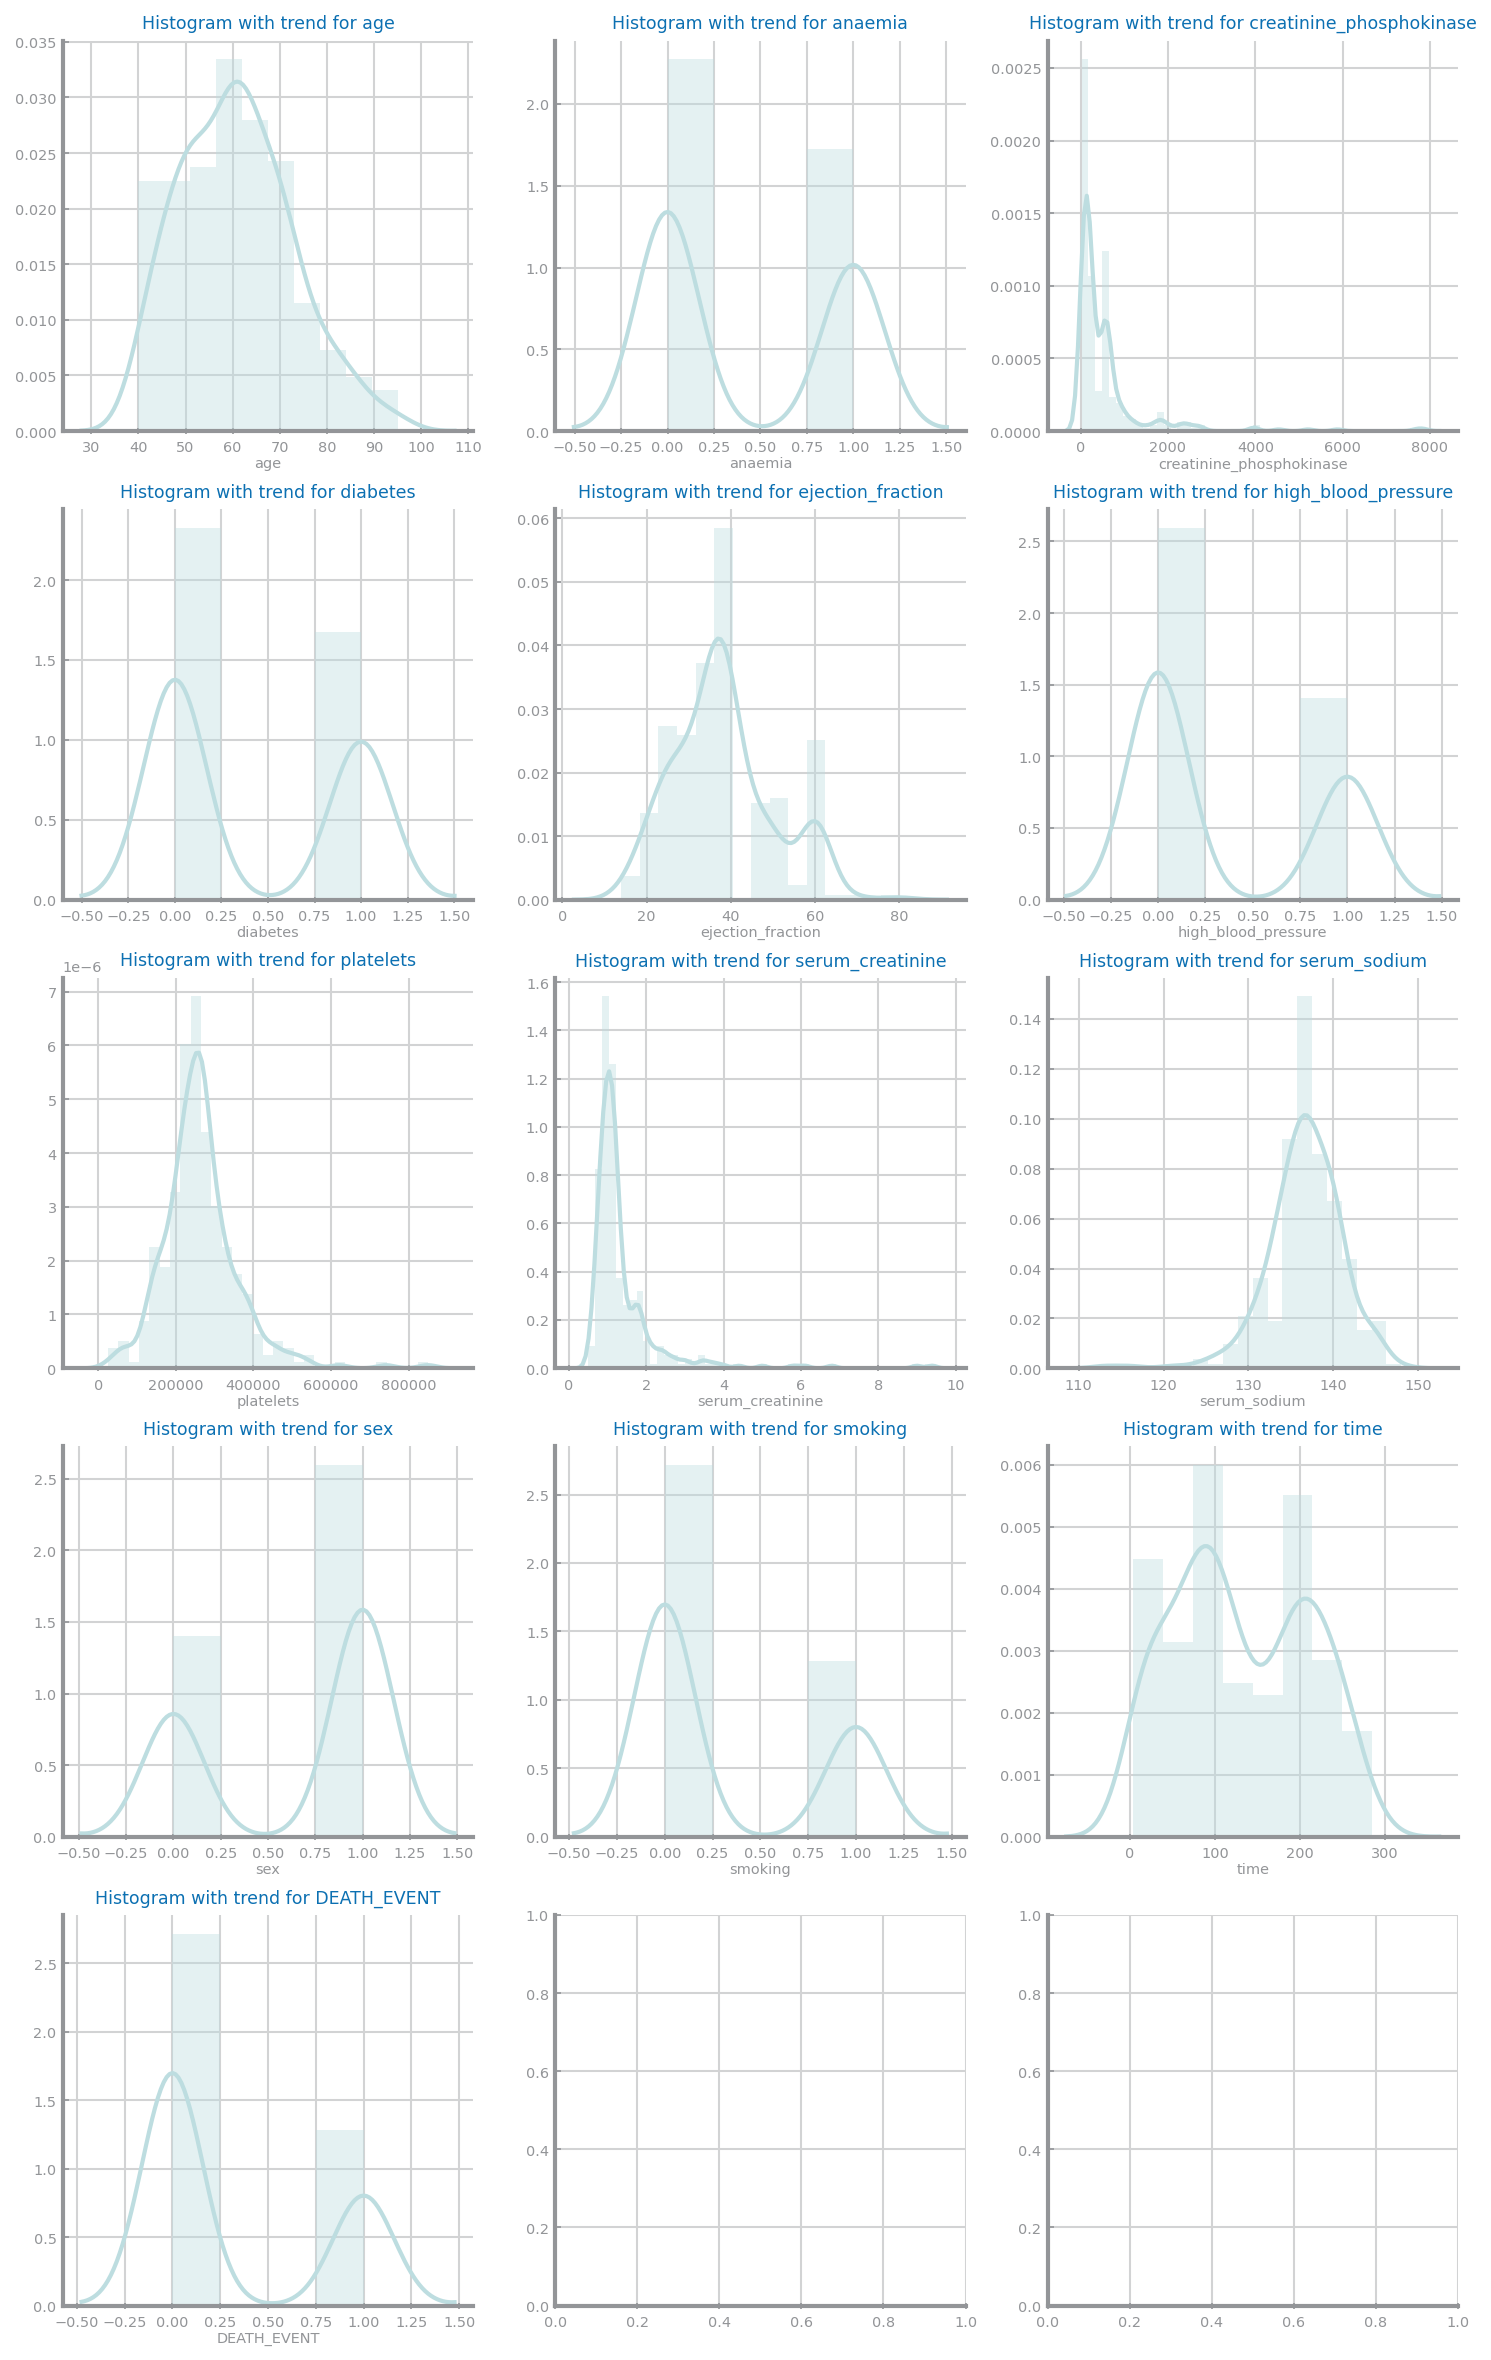

In [101]:
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(numeric_vars)):
    axs[i, j].set_title('Histogram with trend for %s'%numeric_vars[n])
    sns.distplot(data[numeric_vars[n]].dropna().values, norm_hist=True, ax=axs[i, j], axlabel=numeric_vars[n])
    i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
plt.show()

In [94]:
def compute_known_distributions(x_values: list) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = _stats.norm.fit(x_values)
    distributions['Normal(%.1f,%.2f)'%(mean,sigma)] = _stats.norm.pdf(x_values, mean, sigma)
    # Exponential
    loc, scale = _stats.expon.fit(x_values)
    distributions['Exp(%.2f)'%(1/scale)] = _stats.expon.pdf(x_values, loc, scale)
    # LogNorm
    sigma, loc, scale = _stats.lognorm.fit(x_values)
    distributions['LogNor(%.1f,%.2f)'%(np.log(scale),sigma)] = _stats.lognorm.pdf(x_values, sigma, loc, scale)
    return distributions

def histogram_with_distributions(ax: plt.Axes, series: pd.Series, var: str):
    values = series.sort_values().values
    ax.hist(values, 20, density=True)
    distributions = compute_known_distributions(values)
    ds.multiple_line_chart(values, distributions, ax=ax, title='Best fit for %s'%var, xlabel=var, ylabel='')

## Normal, expon,

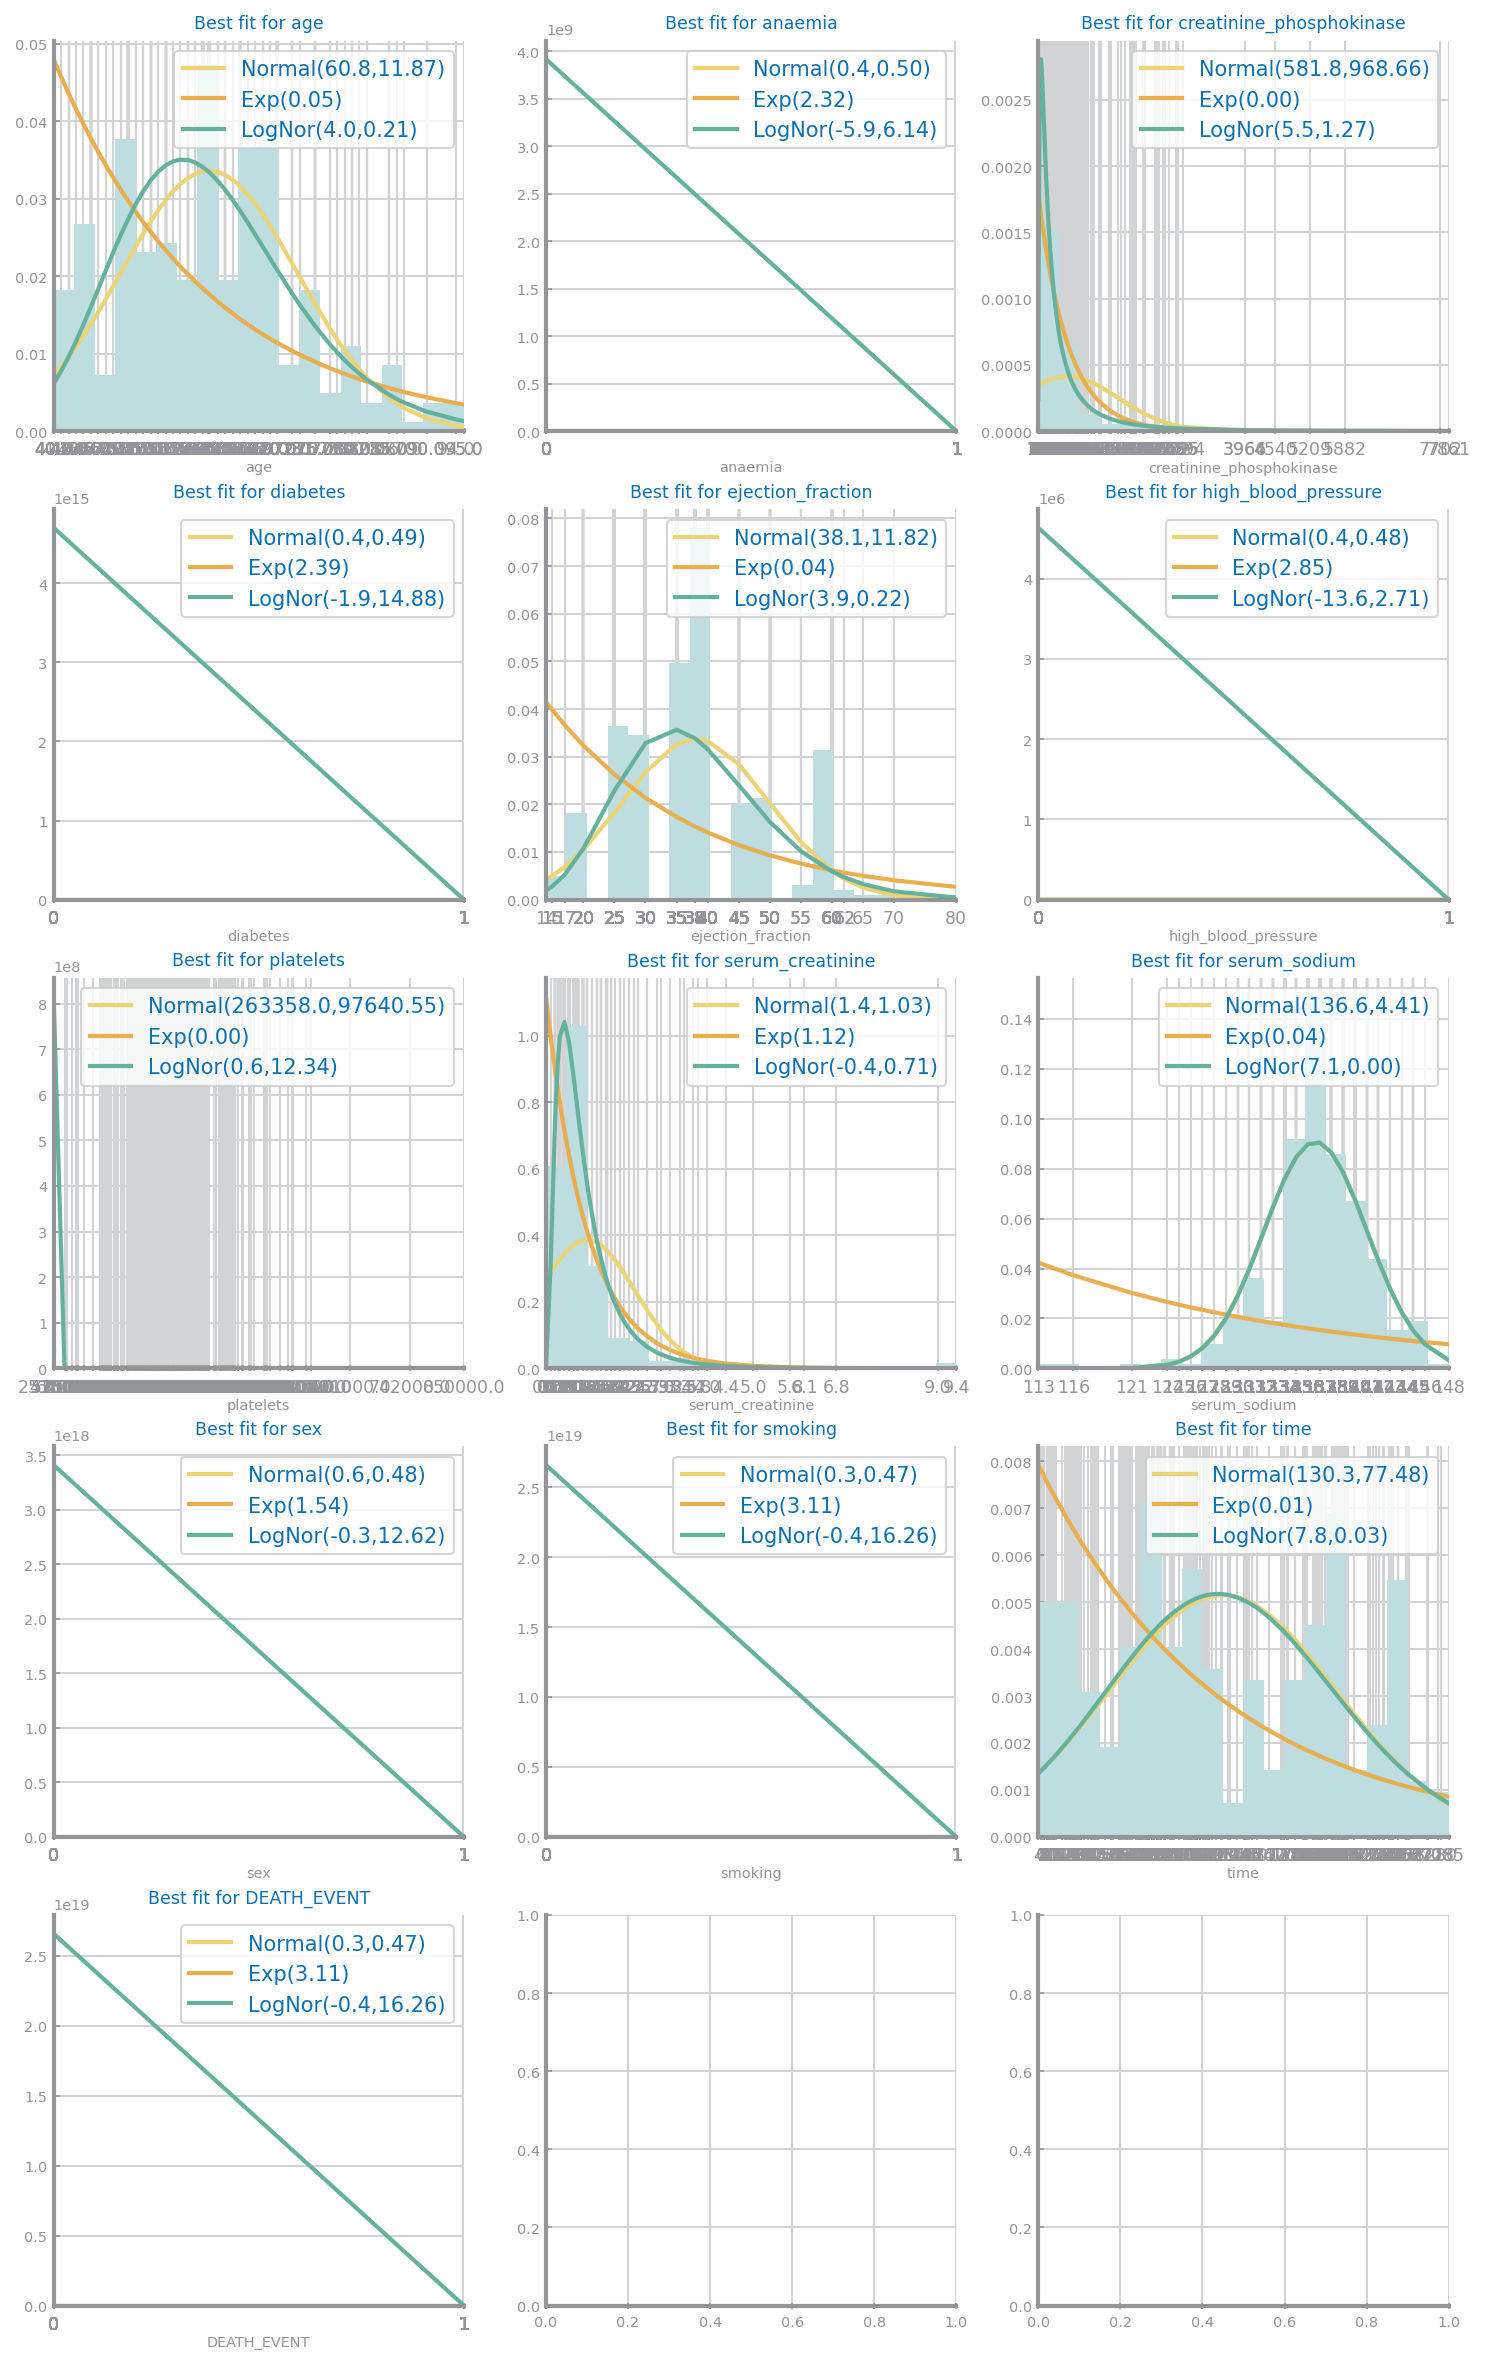

In [98]:
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(numeric_vars)):
    histogram_with_distributions(axs[i, j], data[numeric_vars[n]].dropna(), numeric_vars[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()


XXXXXXXXXXX
fluid_velocity	river_depth	season
count	200	200	200
unique	3	3	4
top	high	medium	winter
freq	84	84	62

# *Granularity*

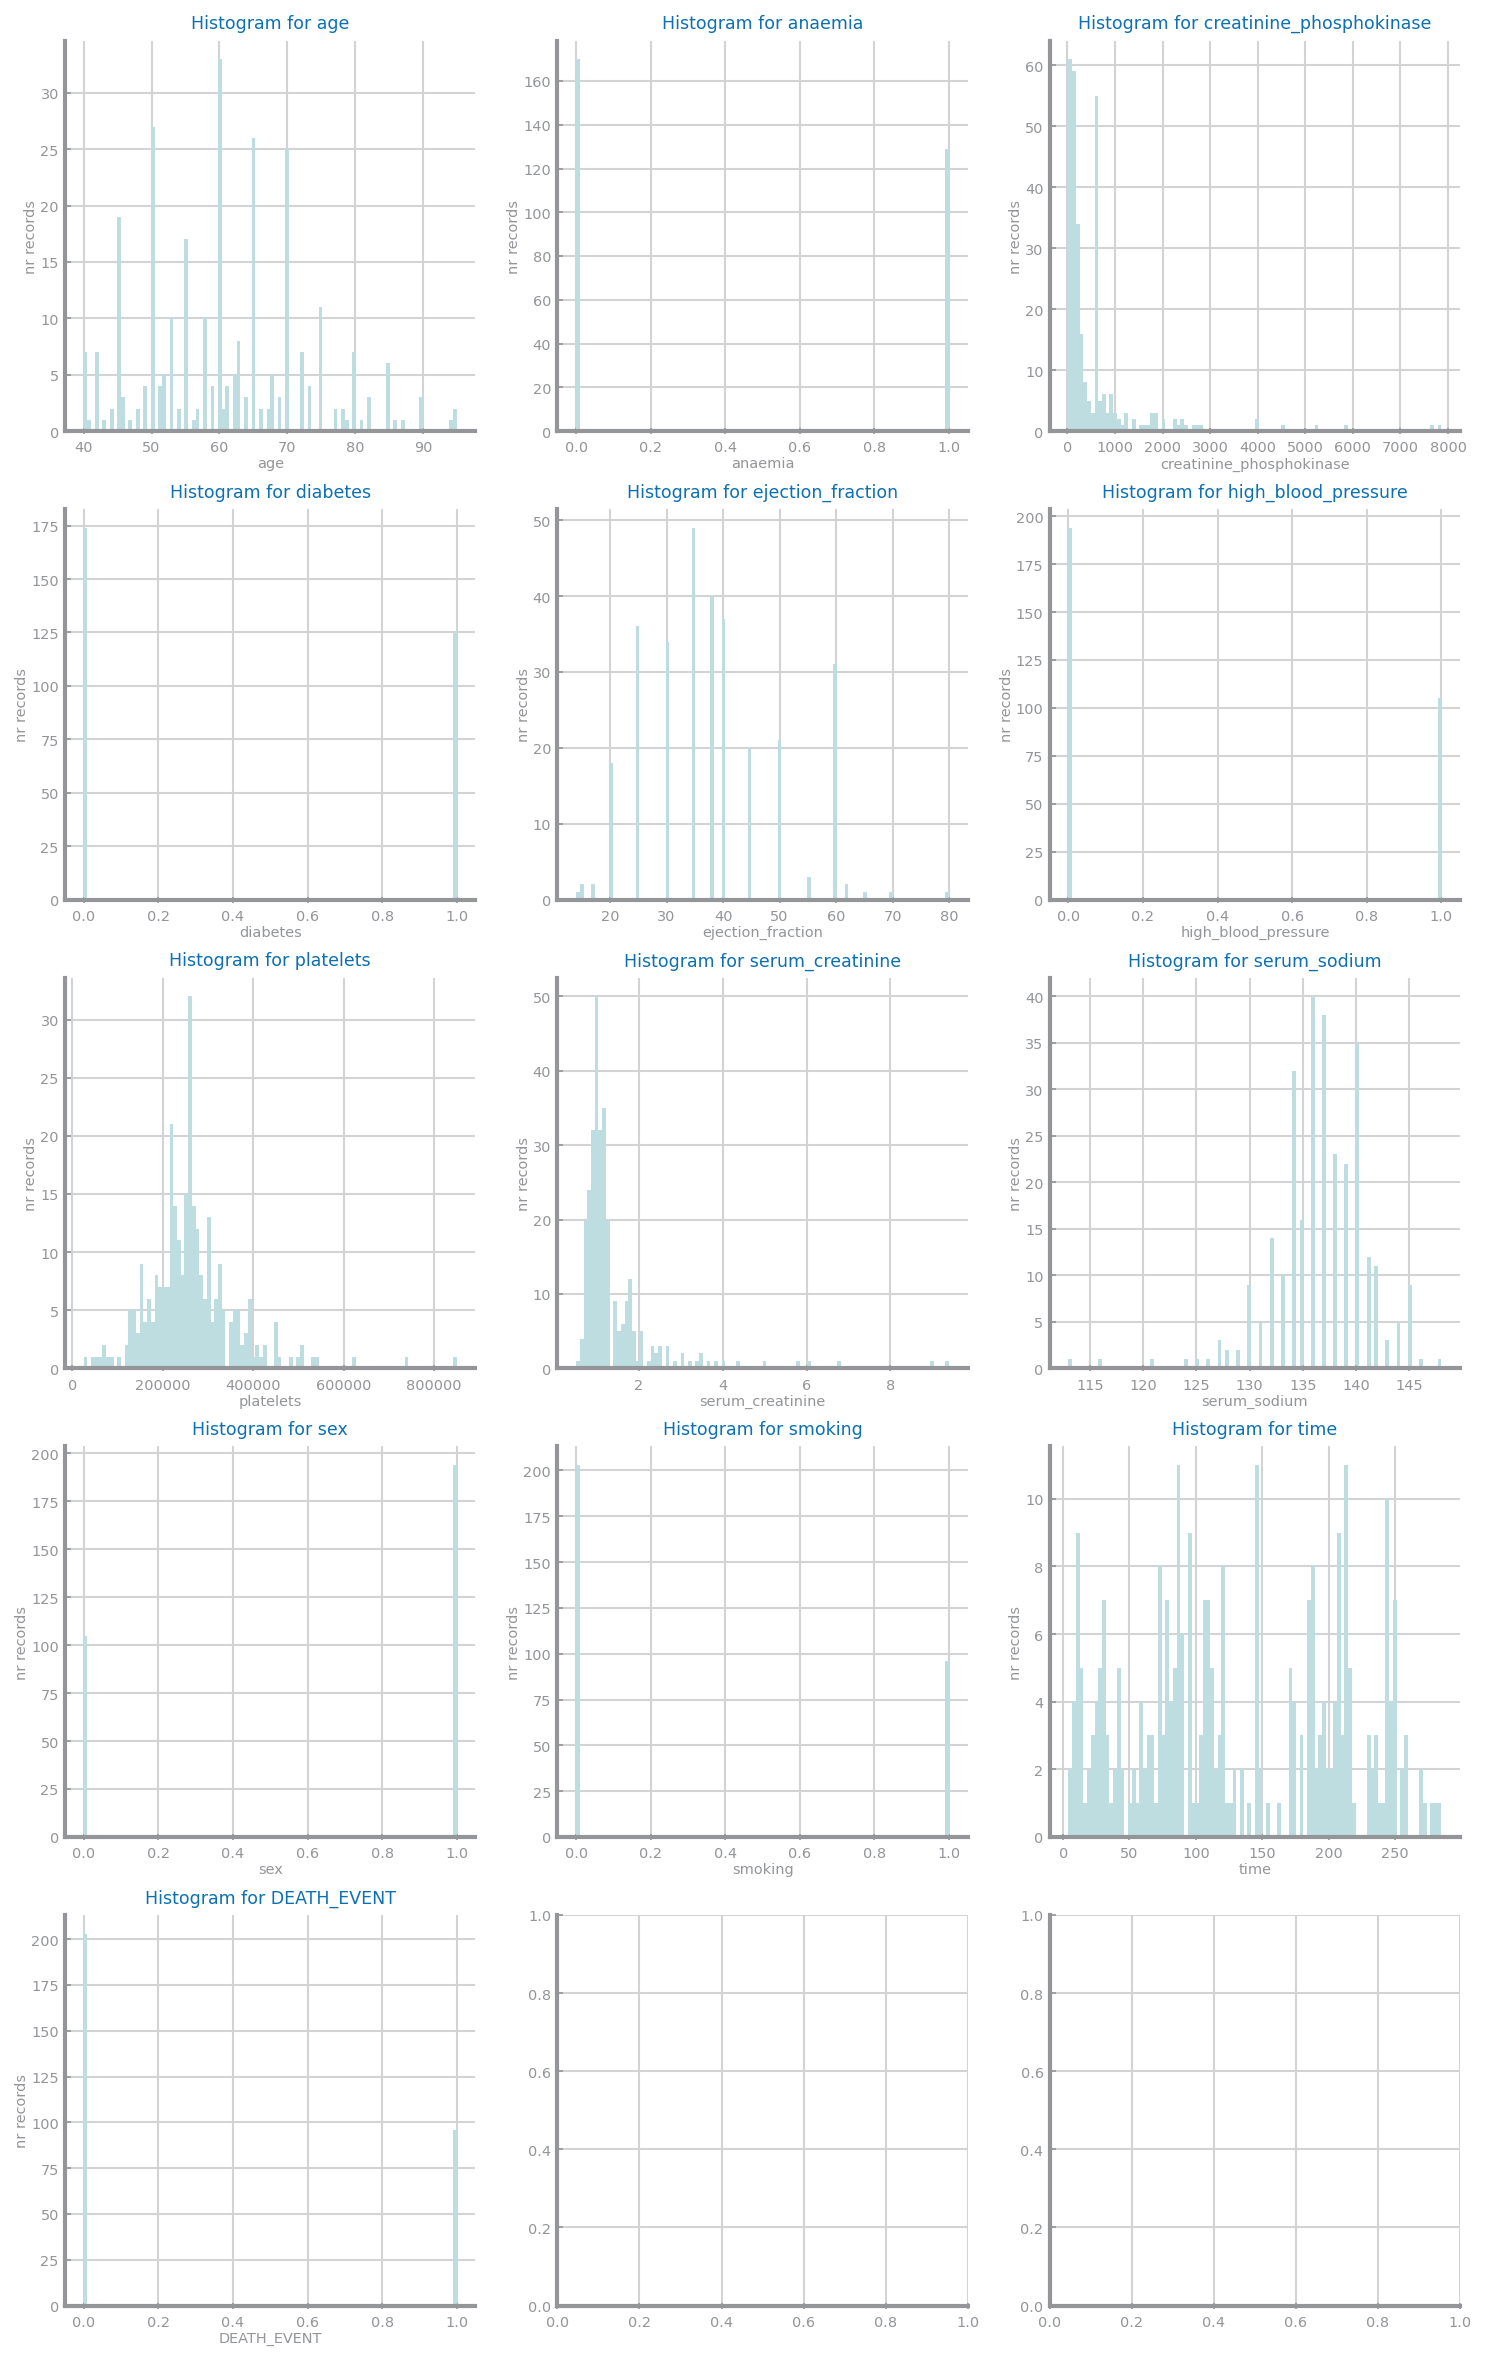

In [108]:
variables = data.select_dtypes(include='number').columns
rows, cols = ds.choose_grid(len(variables))
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(variables)):
    axs[i, j].set_title('Histogram for %s'%variables[n])
    axs[i, j].set_xlabel(variables[n])
    axs[i, j].set_ylabel('nr records')
    axs[i, j].hist(data[variables[n]].values, bins=100)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

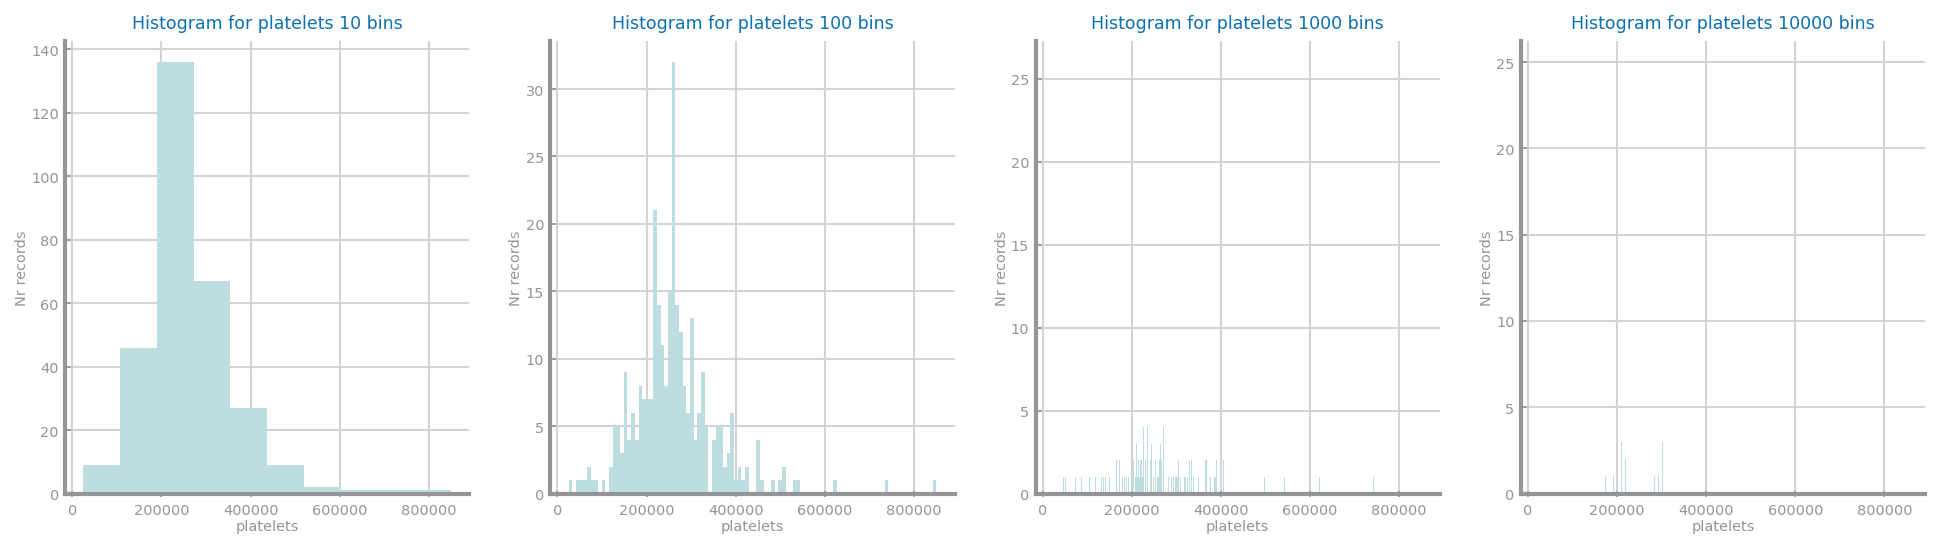

In [118]:
bins = (10, 100, 1000, 10000)
fig, axs = plt.subplots(1, len(bins), figsize=(len(bins)*ds.HEIGHT, ds.HEIGHT))
for j in range(len(bins)):
    axs[j].set_title('Histogram for %s %d bins'%('platelets', bins[j]))
    axs[j].set_xlabel('platelets')
    axs[j].set_ylabel('Nr records')
    axs[j].hist(data['platelets'].values, bins=bins[j])
plt.show()

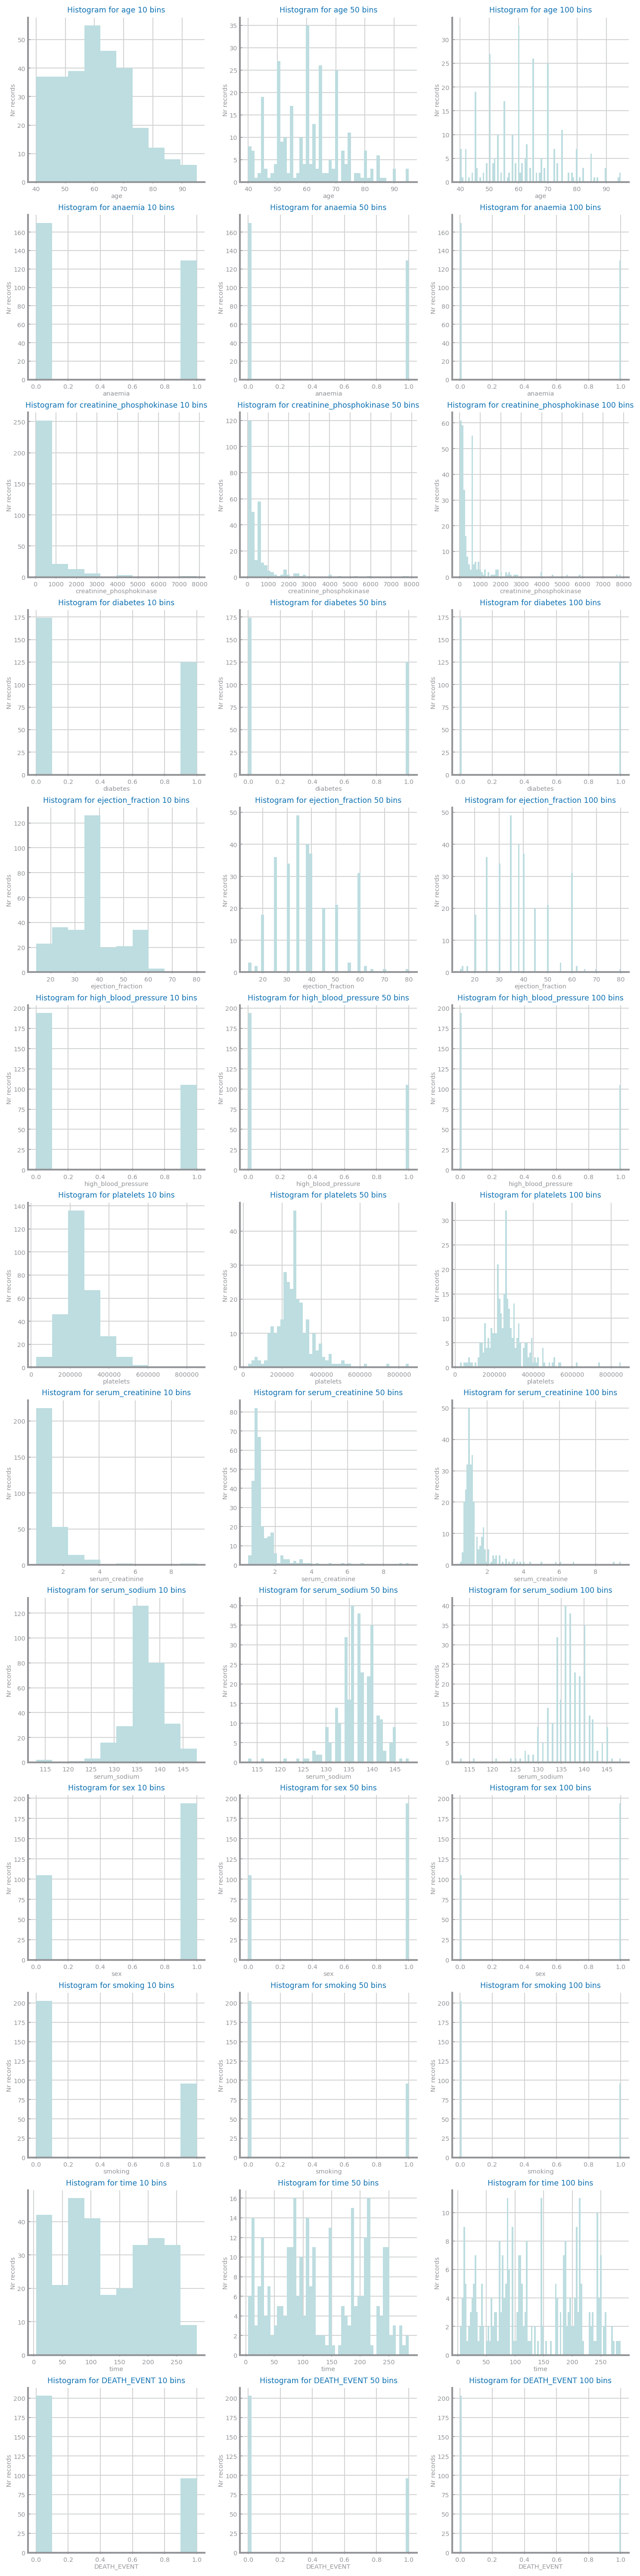

In [121]:
columns = data.select_dtypes(include='number').columns
rows = len(columns)
bins = (10, 50, 100)
cols = len(bins)
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
for i in range(rows):
    for j in range(cols):
        axs[i, j].set_title('Histogram for %s %d bins'%(columns[i], bins[j]))
        axs[i, j].set_xlabel(columns[i])
        axs[i, j].set_ylabel('Nr records')
        axs[i, j].hist(data[columns[i]].values, bins=bins[j])
plt.show()